In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Basic summary of the data set 

In [8]:
import pickle

import pandas as pd
import cv2
import numpy as np
from sklearn import preprocessing
import os
from random import shuffle
import glob
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import math

In [9]:
training_raw_file = "traffic-signs-data/train.p"
validation_raw_file = "traffic-signs-data/valid.p"
testing_raw_file = "traffic-signs-data/test.p"

training_processed_file = "traffic-signs-data/train-processed.p"
validation_processed_file = "traffic-signs-data/valid-processed.p"
testing_processed_file = "traffic-signs-data/test-processed.p"

csv_features_file = "signnames.csv"

1: Speed limit (30km/h)


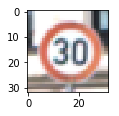

In [11]:
from importlib import reload
import classificationModules
reload(classificationModules)
from classificationModules import Cnn

with open(training_raw_file, mode="rb") as f:
    train_data = pickle.load(f)
with open(validation_raw_file, mode="rb") as f:
    valid_data = pickle.load(f)
with open(testing_raw_file, mode="rb") as f:
    test_data = pickle.load(f)

features_df = pd.read_csv(csv_features_file)
unique_label_ids = [row["ClassId"] for _, row in features_df.iterrows()]
unique_label_names = [row["SignName"] for _, row in features_df.iterrows()]

cnn = Cnn()
cnn.init_model(unique_label_names, unique_label_ids)

# x_train_data, y_train_data = Cnn.normalize(x_train_raw_data, approach="scale"), cnn.one_hot_encode(y_train_raw_data)
# x_valid_data, y_valid_data = Cnn.normalize(x_valid_raw_data, approach="scale"), cnn.one_hot_encode(y_valid_raw_data)
# x_test_data, y_test_data = Cnn.normalize(x_test_raw_data, approach="scale"), cnn.one_hot_encode(y_test_raw_data)

loaded_train_images = train_data["features"]
loaded_train_labels = train_data["labels"]

loaded_valid_images = valid_data["features"]
loaded_valid_labels = valid_data["labels"]

loaded_test_images = test_data["features"]
loaded_test_labels = test_data["labels"]

test_image_index = 2300

print("{0:d}: {1:}".format(loaded_train_labels[test_image_index], cnn.label_names[loaded_train_labels[test_image_index]]))
plt.figure(figsize=(1.5, 1.5))
plt.imshow(loaded_train_images[test_image_index])


Text(0.5, 0, 'Distribution of sample sizes per categories')

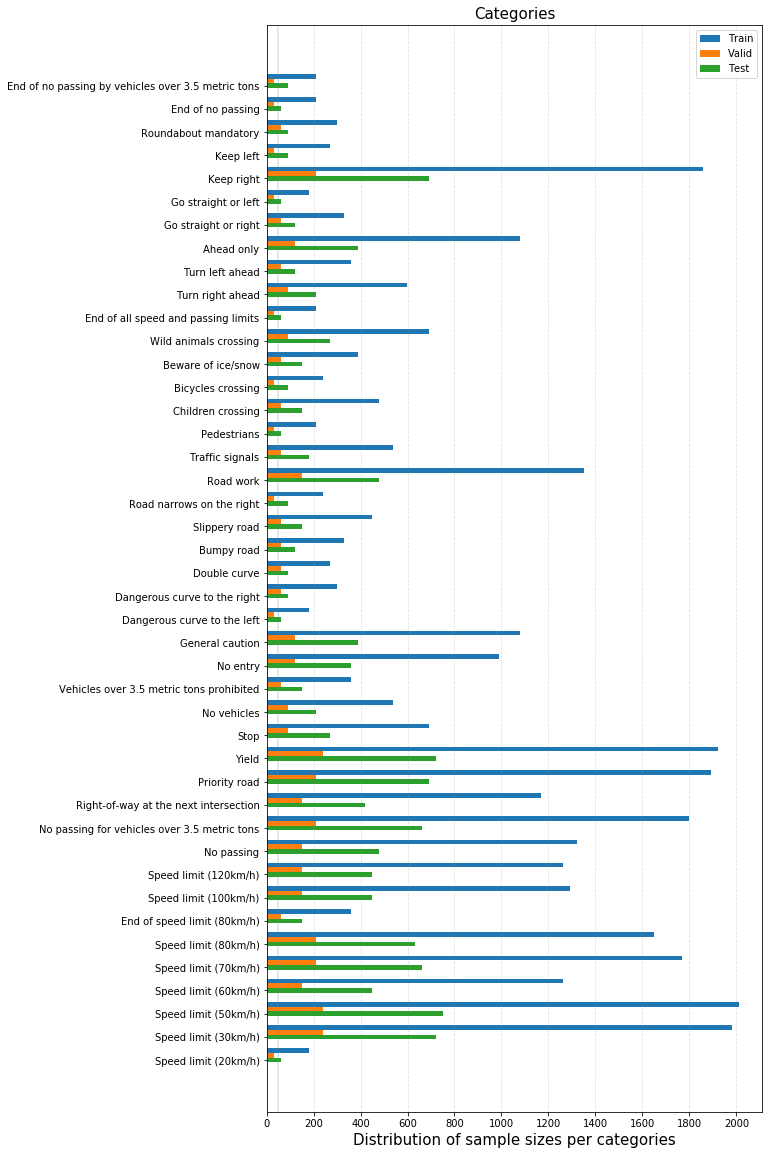

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

train_features_counts = np.asanyarray([(np.where(loaded_train_labels == label_id))[0].size for label_id in unique_label_ids])
valid_features_counts = np.asanyarray([(np.where(loaded_valid_labels == label_id))[0].size for label_id in unique_label_ids])
test_features_counts = np.asanyarray([(np.where(loaded_test_labels == label_id))[0].size for label_id in unique_label_ids])

fig, ax1 = plt.subplots(figsize=(9, 20))
fig.subplots_adjust(left=0.115, right=0.88)
fig.canvas.set_window_title("Data summary")

poses_1 = np.arange(len(unique_label_names))
poses_2 = np.arange(len(unique_label_names)) - 0.2
poses_3 = np.arange(len(unique_label_names)) - 0.4
rects_1 = ax1.barh(poses_1, train_features_counts, align="center", height=0.2, tick_label=unique_label_names, label="Train")
rects_2 = ax1.barh(poses_2, valid_features_counts, align="center", height=0.2, tick_label=unique_label_names, label="Valid")
rects_3 = ax1.barh(poses_3, test_features_counts, align="center", height=0.2, tick_label=unique_label_names, label="Test")
ax1.set_title("Categories", fontsize=15)
ax1.legend()
# ax1.set_xlim([0, 100])
ax1.xaxis.set_major_locator(MaxNLocator(11))
ax1.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=0.25)
# Plot a solid vertical gridline to highlight the median position
ax1.axvline(50, color="grey", alpha=0.25)
ax1.set_xlabel("Distribution of sample sizes per categories", fontsize=15)


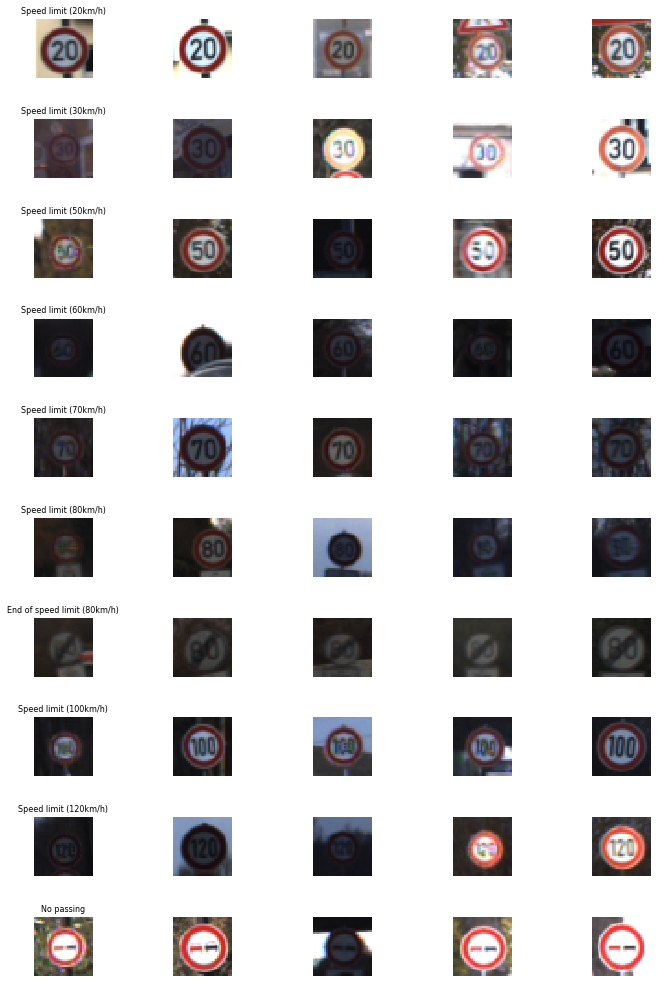

In [74]:
nrows = 10
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, int(1.4*nrows)))
plt.subplots_adjust(top=0.5, bottom=0.01, hspace=0.0, wspace=0.0)

for i_row in range(nrows):
    selected_images = loaded_train_images[np.where(loaded_train_labels == i_row)]
    
    counter = 0
    
    for i_col in range(ncols):
        axis = axes[i_row, i_col]
        axis.axis("off")
        
        # train_features_counts
        axis.imshow(selected_images[i_col + 20*counter])
        counter += 1
        
        if(i_col == 0):
            axis.set_title(unique_label_names[i_row], fontsize=8.0)

fig.subplots_adjust(left=0.115, right=0.88)
fig.tight_layout()